# Ensemble Learning

It is one of the most powerful and most used techniques in Machine Learning. The term "ensemble" means a group of Musicians but in terms of Machine Learning it means a group of models used together. This technique is so powerful and reliable because instead of relying on only one model we are giving chance to multiple models(it is not necessary that the models will be of same kind).

There are multiple techniques in Ensemble methods. The most populer ones are-
1. Voting Classifiers
2. Bagging
3. Boosting
4. Stacking

# 1. Voting Classifiers

It is one the simplest ensemble method used in Machine Learning. In this method we train multiple models with our training data. They may be diverse models like one can be a Support Vector Machine, one may be a Logistic Regression etc. Then, while predicting the result we give each test point to each models and we take the majority vote and for regression problem we take the mean or median of the predictions.

Lets suppose we have a binary classification problem and we have the labels 0 and 1. So we train each of the models with our training data and suppose we have trained 5 models. At the time of prediction we gave each model the test data and suppose the predictions are 1, 0, 1, 1, 0 from the model1, model2, model3, model4 and model5 respectively. Now as there are more number of 1 s in the predictions we will take the prediction as 1. Now lets see it in action and it is pretty easy to implement it using sklearn.

In [7]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the data
data = pd.read_csv('breast_cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# dropping the unecessary columns
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
# diagnosis is the dependent feature so take X as the independent features and Y as the dependent feature
X = data.drop(['diagnosis'], axis=1)
Y = data['diagnosis']
# there are two class labels 'M' for Malignant and 'B' for Benign
# Lets assign values -1 to M and 1 to B
Y = Y.map({'M':-1, 'B':1})

In [5]:
# splitting the data into train and test set, we are using 20% of the data as test data
x_train, x_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.2, stratify=Y)

In [13]:
# we will use VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# create the base mmodels, we will train 5 classifiers(Decision Tree, Support Vector Machine, Logistic regression
# K-Nearest Neighbor and Naive Bayes)
dt = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()

# fitting the base models on the training data
dt.fit(x_train, y_train)
svc.fit(x_train, y_train)
lr.fit(x_train, y_train)
knn.fit(x_train, y_train)
nb.fit(x_train, y_train)

# testing accuracy of each of the base models
print(f'Decision Tree Accuracy: {accuracy_score(y_test, dt.predict(x_test))}')
print(f'Support Vector Machine Accuracy: {accuracy_score(y_test, svc.predict(x_test))}')
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, lr.predict(x_test))}')
print(f'KNN Accuracy: {accuracy_score(y_test, knn.predict(x_test))}')
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, nb.predict(x_test))}')

# now lets train the voting classifier
vc = VotingClassifier(estimators=[('dt', dt), ('svc', svc), ('lr', lr), ('knn', knn), ('nb', nb)])
vc.fit(x_train, y_train)
print(f'Voting Classifier Accuracy: {accuracy_score(y_test, vc.predict(x_test))}')

Decision Tree Accuracy: 0.9736842105263158
Support Vector Machine Accuracy: 0.9210526315789473
Logistic Regression Accuracy: 0.9473684210526315
KNN Accuracy: 0.9210526315789473
Naive Bayes Accuracy: 0.9736842105263158
Voting Classifier Accuracy: 0.9736842105263158


Here in this case we can see that the accuracy of Decision Tree, Logistic Regression and Naive Bayes is better then the others, so majority votes are mostly taken on their decisions, thats why we can see that the accuracy of Decision Tree, Naive Bayes and the Voting Classifier is exactly the same.

# 2. Bagging

Now as we have seen how voting classifiers work we now have a slight understanding about ensemble methods. The next ensemble method that we will learn is Bagging. It stands for Bootstrap Aggregation. The the 2 main terms, "Bootstrap" means splitting the data in certain manner and "Aggregation" as aggregating the results of the models(for classification majority vote and for regression mean or median). Bagging is so powerful and the most powerful Bagging technique is Random Forest. We will look into Random Forest but lets understand what is Bagging.

In Bagging we need low bias and high variance base models. Now a simple example of such model is a Decision Tree with a reasonable depth, say 30. We know a Decision Tree of such depth will simple overfit the data and thats why we will get low bias high variance model. Now combining these models we will eventually get a model which is low bias and low variance model, what we expect from any model. That is the idea of Bagging. Now lets look as Random Forest.

## Random Forest

In Random Forest each of the base models are decision trees. The name "Forest" is the reason for that. The reason of naming it "Random" is because of random sampling of rows and random sampling of columns. We use bagging+column sampling to train each base models with few rows and few columns. Then at the prediction time we use majority vote for classification and mean or median for regression. 

Now, I will show a code for Random Forest Classifier from scratch using sklearn's DecisionTreeClassifier to show you how easy it is internally.

In [14]:
class RandomForest:
    # intializing the required parameters
    # max_depth is default 30 to ensure a low bias, high variance model
    # col_sample is 0.5 as default to use only 50% of the columns to train base model
    # row_sample is 0.5 as default to use only 50% of rows to train base model
    def __init__(self, n_estimators=10, max_depth=30, col_sample=0.5, row_sample=0.5):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.col_sample = col_sample
        self.row_sample = row_sample
        
    def fit(self, X, Y):
        # these lists are used to keep track of the base models and their corresponding columns used to train them
        self.estimators = []
        self.col_samples = []
        # threshold row number and column number to be used
        row_thresh = int(X.shape[0]*self.row_sample)
        col_thresh = int(X.shape[1]*self.col_sample)
        
        # looping through the no. of estimators to be used
        for i in range(self.n_estimators):
            # building a base classifier
            clf = DecisionTreeClassifier(max_depth=self.max_depth)
            
            # creating random row samples
            row_indices = np.arange(X.shape[0])
            np.random.shuffle(row_indices)
            row_indices = row_indices[:row_thresh]
            
            # creating random column samples
            col_indices = np.arange(X.shape[1])
            np.random.shuffle(col_indices)
            col_indices = col_indices[:col_thresh]
            
            # extracting the random row and column samples
            X_sample = X[row_indices]
            Y_sample = Y[row_indices]
            X_sample = X_sample[:, col_indices]
            
            # fitting the base model on the radomly sampled data
            clf.fit(X_sample, Y_sample)
            
            # adding the model and corresponding column indices to use them later
            self.estimators.append(clf) 
            self.col_samples.append(col_indices)
            
    def predict(self, X):
        outputs = []
        
        # looping through the test data
        for x in X:
            out = []
            # using each base model and their corresponding columns to predict the test data
            for estimator, col_sample in zip(self.estimators, self.col_samples):
                x_sample = x[col_sample]
                out.append(estimator.predict([x_sample])[0])
            # taking the majority vote and adding it to the output array
            outputs.append(max(out, key=out.count))
        return np.array(outputs)

In [15]:
# Now lets see how to simple Random Forest Classifier performs
rclf = RandomForest(n_estimators=100)
rclf.fit(x_train, y_train)
y_pred = rclf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Accuracy: 0.9824561403508771
precision: 1.0
Recall: 0.9722222222222222
F1 Score: 0.9859154929577464


As we can see our own Random Forest Classifier is doing great, but our implementation is not optimized one. Now lets see how sklearns Random Forest Classifier performs on the same data.

In [19]:
from sklearn.ensemble import RandomForestClassifier
# note this oob_score parameter
random_clf = RandomForestClassifier(oob_score=True)
random_clf.fit(x_train, y_train)
y_pred = random_clf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Accuracy: 0.9912280701754386
precision: 1.0
Recall: 0.9861111111111112
F1 Score: 0.993006993006993


As we can see we are getting almost similer performance. But there is an important concept called Out of Bag. Now while training our base classifier we are using random row sample of the data, the rest of the rows are called Out of Bag. Now if we can see the result on the Out of Bag then we can estimate the models performance on the test set as both Out of Bag and test set are unseen data  for the model. Out of Bag is also called as oob. The is an attribute "oob_score" from which we can know the performance on oob.

In [20]:
print(f'Out of Bag score of Random Forest Classifier: {random_clf.oob_score_}')

Out of Bag score of Random Forest Classifier: 0.9582417582417583


So, we can estimate from the oob_score that we can get an accuracy of 95% on the test set, eventually we are getting a higher accuracy on the test set.

There is another property of Bagging techniques which is Feature Importance. While building each Decision Tree they keep note that which feature is more important. So we can get feature importance of each feature and we will know which feature is needed more for our problem.

In [24]:
for name, importance in zip(data.columns, random_clf.feature_importances_):
    print(f'{name}: {importance}')

diagnosis: 0.016384726682740648
radius_mean: 0.013808777933292379
texture_mean: 0.027085798933599574
perimeter_mean: 0.05284352616641131
area_mean: 0.005823971611588287
smoothness_mean: 0.014189227052116416
compactness_mean: 0.05332910040998698
concavity_mean: 0.12222955399469113
concave points_mean: 0.006338531044544683
symmetry_mean: 0.0052525494239652765
fractal_dimension_mean: 0.022995141369762318
radius_se: 0.004577601983663595
texture_se: 0.010254202897495318
perimeter_se: 0.018758727594880443
area_se: 0.003235897275522856
smoothness_se: 0.006454596380596502
compactness_se: 0.005397855005372135
concavity_se: 0.00799779760907504
concave points_se: 0.005134807897842808
symmetry_se: 0.0045165661650876515
fractal_dimension_se: 0.14954535570785424
radius_worst: 0.020551411911101884
texture_worst: 0.1325603740819509
perimeter_worst: 0.10775480063521904
area_worst: 0.01362444182985713
smoothness_worst: 0.023065164337619612
compactness_worst: 0.02378657805319064
concavity_worst: 0.105784

## Extemely Randomized Trees

There is another variation of Random Forests called Extremely Randomized Tress. In this method all the properties are same as Random Forests but there is another kind of randomization. While dealing with numerical features Decision Trees sort them in ascending order and take each of them to calculate the threshold value, but in case of Extremely Radomized Trees they take a random sample of these numerical featues to calculate the threshold value. Lets take a look at this in coding.

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
extra_random_clf = ExtraTreesClassifier()
extra_random_clf.fit(x_train, y_train)
y_pred = extra_random_clf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Accuracy: 0.9824561403508771
precision: 1.0
Recall: 0.9722222222222222
F1 Score: 0.9859154929577464


# 3. Boosting

It is the most powerful ensemble technique. In Boosting we take multiple weak learners and combine them to get a strong learner. In boosting the models we take are high bias and low variance models and combine them to get a low bias, low variance model. A simple example of such model is Decision Tree with which is shallow means the depth is low. Generally we take Decision Tree of depth 1(Decision Stump). There are various methods in boosting. The most popular are AdaBoost and Gradient Boosting.

## AdaBoost

It is one of the most popular Boosting technique. In this technique we take a base learner at first, we assign a weight to all the samples, then we train it on the training data. Then we see how the performance of the model on the train data and the samples which are incorrectly classified we increase their the weights exponentially. Now with this train data and with these sample weights we train the next base learner and so on.


### The AdaBoost Algorithm

i) Initialize all weights to $w=frac(1/n)$ where n is the number of instances in the dataset

ii) While i < T (T=number of models to be grown) do:

iii) Create a model and get the hypothesis $h_i(x_n)$ for all datapoints $x_n$ in the dataset

iv) Calculate the error ϵ of the training set summing over all datapoints $x_n$ in the training set with:

$$ϵ_i=\frac{\sum_{n=1}^{N}w_n^i*I(y_n!=h_i(x_n))}{\sum_{n=1}^{N}w_n^i}$$
where I(condition) returns 1 if it is True else returns 0

v) Compute α with:
$$α_i=ν*log(\frac{1-ϵ_t}{ϵ_t})$$
where ν is called the learning rate

vi) Update the weights for the N training instances in the next (i+1) model with:
$$w_n^i+1=w_n^i*exp(α_i*I(y_n!=h_i(x_n))$$

vii) After all the itertions, calculate the final output with:
$$f(x)=sign(\sum_{i=1}^{T}α_i*h_i(x)$$

Now we will code an Adaboost Classifier from scratch to see how it performs.

In [29]:
class BoostingClassifier:
    # initializing the required parameters
    # n_estimators - default is 50, it is the number of base learners
    # max_depth - default is 1, it is the maximum depth of base learners
    # learning_rate - default is 0.5, it is used to limit the changes to the weights 
    # and to limit the value of alpha
    def __init__(self, n_estimators=50, max_depth=1, learning_rate=0.5):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.trees = []
        self.alphas = []
        
    def fit(self, X, Y):
        # initializing the weights by 1/n
        weights = np.array([1/len(Y)]*len(Y))
        
        # looping through the no. of estimators
        for i in range(self.n_estimators):
            # building a base learner
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            
            # fitting the base learner with corresponding sample weights
            tree.fit(X, Y, sample_weight=weights)
            
            # adding the base learner to the list of base learners
            self.trees.append(tree)
            
            # predicting the class labels with this weak base learner
            y_pred = tree.predict(X)
            
            # calculating error
            error = np.sum(weights * (y_pred!=Y).astype(np.int))/np.sum(weights)
            
            # calculating alpha by multiplying with the learning rate
            alpha = self.learning_rate*np.log((1-error)/error)
            
            # adding this alpha to the list of alphas
            self.alphas.append(alpha)
            
            # updating the weights exponentially for the misclassified samples
            weights = weights * np.exp(alpha * (y_pred!=Y).astype(np.int))
    
    def predict(self, X):
        predictions = []
        
        # looping through all the alphas and the base models
        for alpha, tree in zip(self.alphas, self.trees):
            # multiplying alpha with the predictions of a base model
            y_pred = alpha * tree.predict(X)
            
            # adding this prediction to the list of predictions
            predictions.append(y_pred)
            
        # only the sign of the predictions will be required
        return  np.sign(np.sum(predictions, axis=0))

In [30]:
gclf = BoostingClassifier()
gclf.fit(x_train, y_train)
y_pred = gclf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Accuracy: 0.9912280701754386
precision: 1.0
Recall: 0.9861111111111112
F1 Score: 0.993006993006993


As we can see our own AdaBoost Classifier is doing great. It is also ouperforming the sklearn's RandomForestClassifier. So we can understand how powerful is Boosting techniques. Now we will take a look at sklearn's implementation of AdaBoost.

In [31]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(x_train, y_train)
y_pred = adaboost_clf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Accuracy: 1.0
precision: 1.0
Recall: 1.0
F1 Score: 1.0


As we can see sklearn's AdaBoostClassifier is so powerful. It is giving 100% score to all the metrics.

# Gradient Boosting

Another very popular Boosting algorithm is Gradient Boosting. Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual
errors made by the previous predictor.

Now we will look into the implementation of Gradient Boosting in sklearn.

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost_clf = GradientBoostingClassifier()
gradboost_clf.fit(x_train, y_train)
y_pred = gradboost_clf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Accuracy: 0.9736842105263158
precision: 0.9859154929577465
Recall: 0.9722222222222222
F1 Score: 0.979020979020979


As we can see the performance is again great but the implementation of Gradient Boosting in sklearn is not well optimized.
The implementation is based on the idea of Residuals + Row Sampling
Their is another package in python called "xgboost". There the implementation of Gradient Boosting is well optimized and it performs great.
This implementation is based on the idea of Residuals + Row Sampling + Column Sampling
Just use "pip install xgboost" to install the package.
Now we will take a look into the implementation of Gradient Boosting in xgboost.

In [33]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Accuracy: 0.9912280701754386
precision: 0.9863013698630136
Recall: 1.0
F1 Score: 0.993103448275862


# 4. Stacking Classifier

It is one of the most powerful ensemble methods. In this method we take models which are well trained and have a good bias-variance trade-off.
Here using the predictions of the base models, a new dataset is formed and from that we try to create a meta classifier which predicts the actual class labels.
The picture below desribes how a stacking classifier is formed.
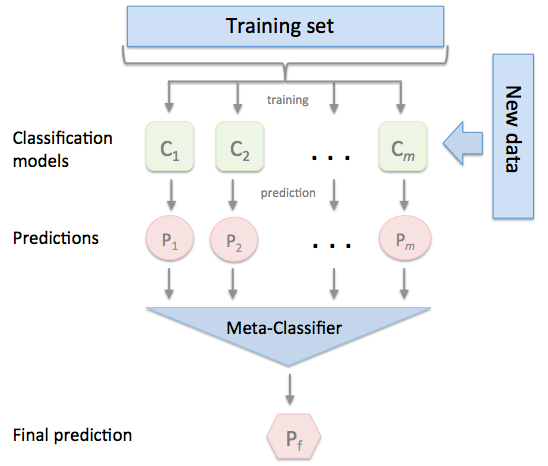

In sklearn there is no direct implementation of Stacking Classifier but we can make it by our own. There is another package called "mlxtend" and there is an implementation of Stacking Classifier.
We will use mlxtend to see how a stacking classifier is performing.
Just use "pip install mlxtend" to install the package.

In [42]:
from mlxtend.classifier import StackingClassifier
# building the base models
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
# Logistic Regression model will be used as the Meta Classifier
lr = LogisticRegression()
stacking_clf = StackingClassifier(classifiers=[knn, rf, nb], meta_classifier=lr)
# looping through the  classifiers and taking a look at how they are performing
for name, clf in zip(['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier'], [knn, rf, nb, stacking_clf]):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f'Accuracy of {name}: {accuracy_score(y_test, y_pred)}')

Accuracy of KNN: 0.9210526315789473
Accuracy of Random Forest: 0.9824561403508771
Accuracy of Naive Bayes: 0.9736842105263158
Accuracy of Stacking Classifier: 0.9912280701754386


So,  we can see the Stacking Classifier is performing great.
Generally Stacking Classifiers are great as generally they give better accuracy than Bagging and Boosting classifiers, but we can see the training time and evaluation time for Stacking Classifier is pretty high. Thats why they are typically not used in real time applications, but they are really great for competitions like Kaggle. 

# References
1. https://www.python-course.eu/Boosting.php
2. Hands on Machine-Learning with Scikit-Learn, Tensorflow and Keras by O'Reilly 2nd Edition